In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [34]:
# Python SQL toolkit and Object Relational Mapper
# import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import os

In [66]:
db_path = os.path.join("Resources", "hawaii.sqlite")

connection_string = f"sqlite:///{db_path}"

engine = create_engine(connection_string)

conn = engine.connect()

In [59]:
# reflect an existing database into a new model

# automap_base()

# reflect the tables

In [ ]:
# We can view all of the classes that automap found

In [ ]:
# Save references to each table
cmd_measurement = "SELECT * FROM measurement;"
cmd_station = "SELECT * FROM station;"

Station = engine.execute(cmd_station)
Measurement = engine.execute(cmd_measurement)

In [139]:
Station_df = pd.read_sql(cmd_station, conn)
Station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [64]:
# for row in Station:
#     print(dict(row))

In [62]:
# for row in Measurement:
#     print(dict(row))

In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

## Precipitation Analysis

In [107]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Note: 2012 and 2016 were leap years

# Calculate the date 1 year ago from the last data point in the database
# start_date = max(measurement.date)-365

# Perform a query to retrieve the date and precipitation scores
precip_measurement = "SELECT measurement.date, measurement.prcp FROM measurement WHERE measurement.date >= '2016-08-23';"
precip = engine.execute(precip_measurement)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(precip_measurement, conn)

# Sort the dataframe by date
df.sort_values(by="date")
df.set_index("date")

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


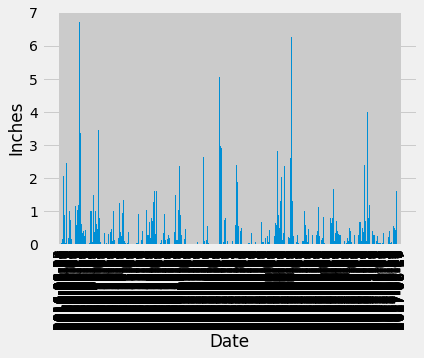

In [110]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df["date"], df["prcp"])
plt.xticks(df["date"], rotation="vertical")
plt.ylabel("Inches")
plt.xlabel("Date")
# plt.legend(loc="upper left")
plt.show()

In [111]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [132]:
# Design a query to show how many stations are available in this dataset?
station_count = "SELECT COUNT(DISTINCT(measurement.station)) FROM measurement"
engine.execute(station_count)
df_station_count = pd.read_sql(station_count, conn)
df_station_count

,COUNT(DISTINCT(measurement.station))
0,9


In [137]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = """SELECT m.station, count(m.station) FROM measurement as m
    GROUP BY m.station
    ORDER BY count(m.station) DESC;
    """
df_active_stations = pd.read_sql(active_stations, conn)
df_active_stations

,station,count(m.station)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [144]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = df_active_stations["station"][0]
most_active_station

'USC00519281'

In [150]:
most_active_station_stats = "SELECT min(m.tobs), max(m.tobs), avg(m.tobs) FROM measurement as m WHERE m.station == 'USC00519281';"
df_most_active_station_stats = pd.read_sql(most_active_station_stats, conn)
df_most_active_station_stats

,min(m.tobs),max(m.tobs),avg(m.tobs)
0,54.0,85.0,71.663781


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
